# <span style="color:#809">S30 - Evidencia de aprendizaje 1.
## Análisis y herramientas de extracción de datos</span>
<span style="color:#809">Estudiantes:</span>

## <span style="color:#809"> German Darío Arbeláez Ríos</span>
## <span style="color:#809">Juan Carlos Presiga Montoya</span>
## <span style="color:#809"> Carlos Alberto Velez Muñoz</span>
## <span style="color:#809">
Equipo # 7

GRUPO
2402B020107

</span>

## <span style="color:#809">Programa: </span>     Ingeniería de Software y Datos

<span style="color:#809">Curso: </span>  Programación para Análisis de Datos


# <span style="color:#809">Profesor: </span>   Andrés Felipe Palacio



<span style="color:#809">Universidad:</span> Universidad digital de Antioquía – IUDIGITAL

**<span style="color:#809">Fecha: </span>  03 Noviembre del 2024**



## Selecciona una página de comercio electrónico como Amazon o Mercado Libre, donde se manejen compras en línea, y aplica los conceptos vistos sobre la metodología empleada de scraping: Beautifulsoup, Selenium y Scrapy. Para ello, debes elegir uno de los artículos publicados en la página seleccionada.

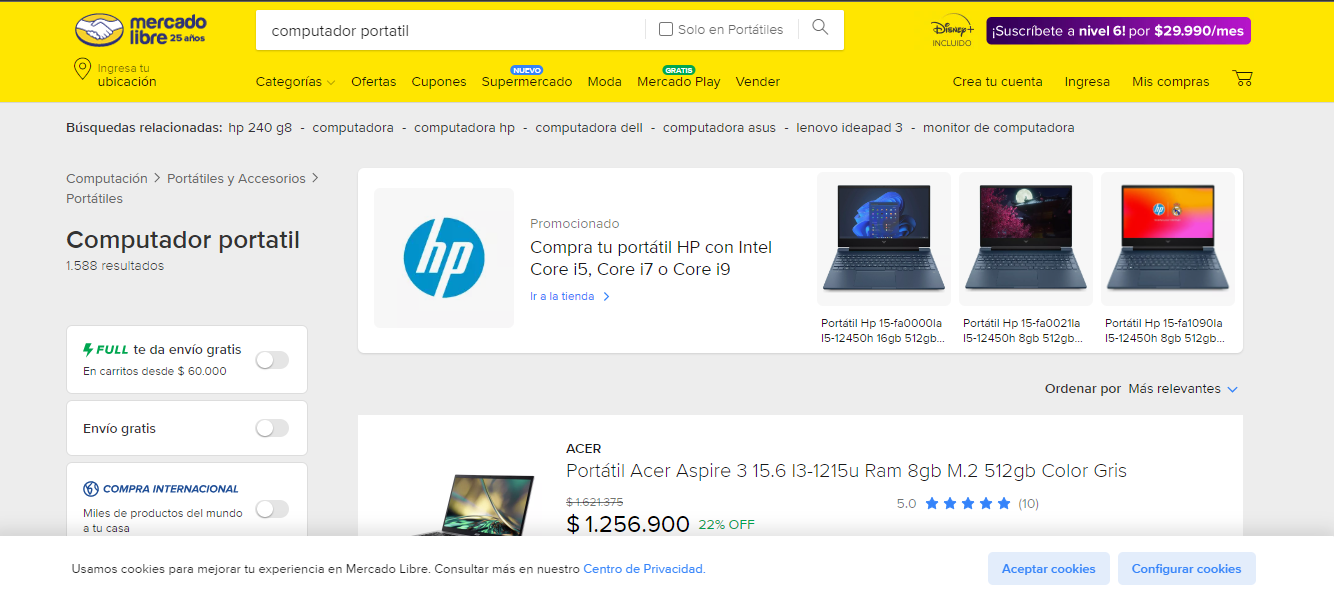

# Descripción de la página y artículo a analizar.

## La página de portátiles en Mercado Libre muestra una amplia gama de computadoras portátiles, categorizadas por marcas, especificaciones y precios. Los usuarios pueden filtrar su búsqueda por características como procesador, memoria RAM y capacidad de almacenamiento. Además, se presentan opciones de compra nuevas y usadas, con descripciones detalladas y reseñas de los productos. Hay promociones y comparativas de precios que ayudan a los compradores a tomar decisiones informadas.

# Descripción del tema de interés que deseas desarrollar en la primera práctica.

## La sección de portátiles en Mercado Libre se presenta como una herramienta analítica vital para la evaluación de opciones en el mercado de computadoras. Al permitir el filtrado por marcas, precios y características técnicas, la plataforma no solo facilita la búsqueda de productos, sino que también fomenta una comprensión más profunda de las capacidades de cada modelo. Este enfoque metódico permite a los consumidores realizar comparaciones detalladas, contribuyendo a una toma de decisiones más informada y alineada con sus necesidades tecnológicas específicas. La accesibilidad y variedad de información que ofrece esta plataforma la convierten en un recurso valioso para quienes buscan adquirir un equipo de cómputo de manera consciente y efectiva.

# Objetivos: formula los objetivos a partir de la siguiente pregunta: ¿por qué deseas analizar este artículo y la empresa de comercio?

# Realizar un análisis exhaustivo del impacto significativo de los artículos tecnológicos en la toma de decisiones de compra de los consumidores , prestando especial atención a cómo la meticulosa presentación y el filtrado de productos en la categoría de portátiles pueden influir de manera decisiva en sus elecciones.

## Investigar de manera profunda y crítica las sofisticadas estrategias de usuario comerciales implementadas por Mercado Libre , evaluando su efectividad en la visibilidad dinámica de productos y la experiencia del entorno digital contemporáneo. .

## Identificar y categorizar las necesidades y preferencias específicas de los consumidores en la adquisición de computadoras portátiles, utilizando un enfoque basado en datos extraídos de la plataforma para delinear tendencias significativas y comportamientos de compra relevantes.

## Desarrollar recomendaciones prácticas y fundamentadas en evidencia empírica que apunten a mejorar de manera sustancial la experiencia del usuario en plataformas de comercio electrónico, considerando los hallazgos sobre la interacción del consumidor con los artículos tecnológicos y su intrincado proceso de decisión de compra.

## Contribuir de manera significativa al conocimiento académico y práctico sobre comercio electrónico , mediante la elaboración de un estudio detallado que explora de forma exhaustiva la relación entre la presentación cautivadora de productos y la satisfacción del cliente en el sector tecnológico, proponiendo futuras líneas de investigación.

## Metodología empleada de scraping.

# Beautifulsoup

In [ ]:
import requests
import pandas as pd
import json
import csv
import time
from bs4 import BeautifulSoup
from google.colab import files

# URL base de la página a extraer
base_url = "https://listado.mercadolibre.com.co"

# Página inicial para libros infantiles
url = f"{base_url}/computador-portatil#trends_tracking_id=b4521a6a-780f-4ed7-a418-64358852d215&component_id=MOST_WANTED"

# Inicializar lista para almacenar los datos de los libros
computo_portatil_datos = []


# Función para extraer los datos de una página


In [ ]:
def extraer_products(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")

    # Buscar los productos en la página
    products = soup.find_all("ol", class_="ui-search-layout--stack")

    # print(li_producto)
    if not products:
         print("No se encontraron productos.")
         return False

    # Crear una lista para almacenar todos los <li> encontrados
    all_li_items = []
    product_data = []
    # Recorrer cada <ol> y extraer los <li> dentro
    for product_list in products:
        li_items = product_list.find_all("li", class_="ui-search-layout__item shops__layout-item")
        all_li_items.extend(li_items)  # Agregar los <li> a la lista global

    names_products = []
    price_products = []

    for product in all_li_items:
        wraper_producto = product.find("div", class_="ui-search-result__wrapper")
        item_list_producto = wraper_producto.find("div", class_="poly-card poly-card--list")
        conten_producto = item_list_producto.find("div", class_="poly-card__content")
        item_name_producto = conten_producto.find("span", class_="poly-component__brand")
        price_current_producto = conten_producto.find("div", class_="poly-price__current")
        price_item_producto = price_current_producto.find("span", class_="andes-money-amount__fraction")

        if item_name_producto and price_item_producto:
            if hasattr(item_name_producto, 'get_text'):
                names_products.append(item_name_producto.get_text(strip=True))
                price_products.append(price_item_producto.get_text(strip=True))
                brand = item_name_producto.get_text(strip=True) if item_name_producto else "No disponible"
                price = price_item_producto.get_text(strip=True) if price_item_producto else "No disponible"

                computo_portatil_datos.append({
                "marca": brand,
                "precio": price
                })

            else:
                names_products.extend(item_name_producto)
        else:
            names_products.append("No disponible")  # Append a default value if None
            print(f"Warning: item_name_producto is None for {product}") # Add this line to identify problematic elements

        next_page_element = soup.find("ul", class_="andes-pagination")

        if next_page_element and 'href' in next_page_element.attrs:
           next_page_url = base_url + next_page_element['href']
           print(f"Pasando a la siguiente página: {next_page_url}")
           return next_page_url
        else:
            return False
    return product_data
extraer_products(url)

def guardar_csv(product_data, filename="products.csv"):
    with open(filename, "w", newline='', encoding='utf-8') as csvfile:
        fieldnames = ["marca",    "precio"]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames, delimiter= ';')

        writer.writeheader()
        writer.writerows(product_data)
    print(f"Datos guardados en {filename}")

guardar_csv(computo_portatil_datos)
files.download('products.csv')




Datos guardados en products.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

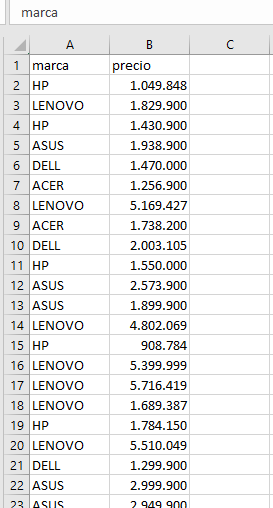

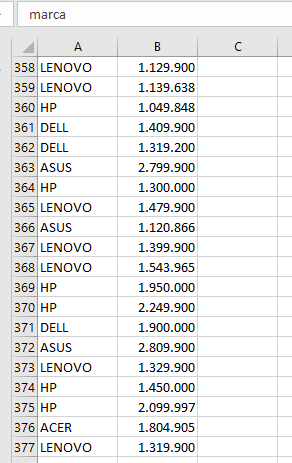

# Conclusiones
## El proceso de extracción ha demostrado ser eficiente, resaltando la importancia de implementar técnicas de web scraping para la recopilación de datos en tiempo real. Los resultados obtenidos son valiosos para el análisis de tendencias del mercado de portátiles y pueden servir como base para futuras investigaciones o decisiones de compra. Es recomendable realizar un análisis más profundo de los datos extraídos para identificar patrones de precios y preferencias de marca.
## La ejecución del código ha permitido la extracción efectiva de datos sobre computadoras portátiles desde la plataforma de Mercado Libre. Los resultados incluyen un conjunto de marcas y precios, lo que proporciona una visión general del mercado disponible. La estructura del código facilita la navegación a través de las páginas, asegurando que se recojan múltiples entradas de productos, y el manejo de excepciones ha permitido identificar elementos problemáticos.


# Bibliografía

## El Asikri, M., Knit, S., & Chaib, H. (2020). Using web scraping in a knowledge environment to build ontologies using python and scrapy. European Journal of Molecular & Clinical Medicine, 7(03), 2020.

## Thomas, D. M., & Mathur, S. (2019, June). Data analysis by web scraping using python. In 2019 3rd International conference on Electronics, Communication and Aerospace Technology (ICECA) (pp. 450-454). IEEE.

## Kouzis-Loukas, D. (2016). Learning scrapy. Livery Place: Packt Publishing.


---

# Inicio Actividad Optimizando la productividad en el mundo del software

#### Continuando con la Evidencia de aprendizaje 1, realiza un proceso de desarrollo de un proyecto utilizando Git y GitHub para la gestión de versiones y la implementación de un flujo de trabajo DevOps con automatización y despliegue continuo.